In [1]:
import pandas as pd  #importing the necessary packages
import warnings
warnings.filterwarnings("ignore")
import shutil
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
#from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import f1_score, make_scorer
import itertools
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn import svm
from sklearn.decomposition import PCA
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Đọc dữ liệu
df_train=pd.read_csv("NSL_KDD_Dataset\KDDTrain+.txt")
df_test=pd.read_csv("NSL_KDD_Dataset\KDDTest+.txt")

In [3]:
# In[ ]:

df_train.head() #Check 5 hàng đầu

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
# In[ ]:


df_train.tail() #check 5 hàng cuối

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [5]:
# In[ ]:


print("Number of data points in train data", df_train.shape)  
print('-'*50)
print("The attributes of data :", df_train.columns.values) #check thuộc tính

Number of data points in train data (125972, 43)
--------------------------------------------------
The attributes of data : ['0' 'tcp' 'ftp_data' 'SF' '491' '0.1' '0.2' '0.3' '0.4' '0.5' '0.6' '0.7'
 '0.8' '0.9' '0.10' '0.11' '0.12' '0.13' '0.14' '0.15' '0.16' '0.17' '2'
 '2.1' '0.00' '0.00.1' '0.00.2' '0.00.3' '1.00' '0.00.4' '0.00.5' '150'
 '25' '0.17.1' '0.03' '0.17.2' '0.00.6' '0.00.7' '0.00.8' '0.05' '0.00.9'
 'normal' '20']


In [6]:
# In[ ]:


print("Number of data points in test data", df_test.shape)
print(df_test.columns.values)
df_test.head(2)

Number of data points in test data (22543, 43)
['0' 'tcp' 'private' 'REJ' '0.1' '0.2' '0.3' '0.4' '0.5' '0.6' '0.7' '0.8'
 '0.9' '0.10' '0.11' '0.12' '0.13' '0.14' '0.15' '0.16' '0.17' '0.18'
 '229' '10' '0.00' '0.00.1' '1.00' '1.00.1' '0.04' '0.06' '0.00.2' '255'
 '10.1' '0.04.1' '0.06.1' '0.00.3' '0.00.4' '0.00.5' '0.00.6' '1.00.2'
 '1.00.3' 'neptune' '21']


,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21


In [7]:
# In[ ]:


df_train.dtypes  #check kiểu dữ liệu

0             int64
tcp          object
ftp_data     object
SF           object
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.17          int64
2             int64
2.1           int64
0.00        float64
0.00.1      float64
0.00.2      float64
0.00.3      float64
1.00        float64
0.00.4      float64
0.00.5      float64
150           int64
25            int64
0.17.1      float64
0.03        float64
0.17.2      float64
0.00.6      float64
0.00.7      float64
0.00.8      float64
0.05        float64
0.00.9      float64
normal       object
20            int64
dtype: object

In [8]:
# In[3]:

#Đổi tên sang 43 feature

df_train = df_train.rename(columns={"0":"Duration","tcp":"protocol_type","ftp_data":"service","SF":"flag","491":"src_bytes",
                                    "0.1":"dest_bytes","0.2":"Land","0.3":"wrong_fragment","0.4":"Urgent packets","0.5":"hot",
                                    "0.6":"num_failed_logins","0.7":"logged_in","0.8":"num_compromised","0.9":"root_shell",
                                    "0.10":"su_attempted","0.11":"num_root","0.12":"num_file_creations","0.13":"num_shells",
                                    "0.14":"num_access_files","0.15":"num_outbound_cmds","0.16":"is_host_login","0.17":"is_guest_login",
                                    "2":"count","2.1":"srv_count","0.00":"serror_rate","0.00.1":"srv_serror_rate","0.00.2":"rerror_rate",
                                    "0.00.3":"srv_rerror_rate","1.00":"same_srv_rate","0.00.4":"diff_srv_rate","0.00.5":"srv_diff_host_rate",
                                    "150":"dst_host_count","25":"dst_host_srv_count","0.17.1":"dst_host_same_srv_rate",
                                    "0.03":"dst_host_diff_srv_rate","0.17.2":"dst_host_same_src_port_rate",
                                    "0.00.6":"dst_host_srv_diff_host_rate","0.00.7":"dst_host_serror_rate",
                                    "0.00.8":"dst_host_srv_serror_rate","0.05":"dst_host_rerror_rate","0.00.9":"dst_host_srv_rerror_rate",
                                    "normal":"attack_type","20":"Score"})

In [9]:
# In[ ]:
print(df_train['protocol_type'].value_counts())
print(df_train['flag'].value_counts())

df_train.head()  #check dataframe sau khi đổi tên

tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64


,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [10]:
# In[4]:


#Tương tự với df_test 

df_test = df_test.rename(columns={"0":"Duration","tcp":"protocol_type","private":"service","REJ":"flag","0.1":"src_bytes",
                                    "0.2":"dest_bytes","0.3":"Land","0.4":"wrong_fragment","0.5":"Urgent packets","0.6":"hot",
                                    "0.7":"num_failed_logins","0.8":"logged_in","0.9":"num_compromised","0.10":"root_shell",
                                    "0.11":"su_attempted","0.12":"num_root","0.13":"num_file_creations","0.14":"num_shells",
                                    "0.15":"num_access_files","0.16":"num_outbound_cmds","0.17":"is_host_login","0.18":"is_guest_login",
                                    "229":"count","10":"srv_count","0.00":"serror_rate","0.00.1":"srv_serror_rate","1.00":"rerror_rate",
                                    "1.00.1":"srv_rerror_rate","0.04":"same_srv_rate","0.06":"diff_srv_rate","0.00.2":"srv_diff_host_rate",
                                    "255":"dst_host_count","10.1":"dst_host_srv_count","0.04.1":"dst_host_same_srv_rate",
                                    "0.06.1":"dst_host_diff_srv_rate","0.00.3":"dst_host_same_src_port_rate",
                                    "0.00.4":"dst_host_srv_diff_host_rate","0.00.5":"dst_host_serror_rate",
                                    "0.00.6":"dst_host_srv_serror_rate","1.00.2":"dst_host_rerror_rate","1.00.3":"dst_host_srv_rerror_rate",
                                    "neptune":"attack_type","21":"Score"})

In [11]:
# In[ ]:


df_train.head()

,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [12]:
# In[ ]:


df_test.head()

,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [13]:
# In[ ]:


# hàng trùng lặp
duplicate_rows_df = df_train[df_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 43)


In [14]:
# In[ ]:


# Giá trị null
print(df_train.isnull().sum())

Duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dest_bytes                     0
Land                           0
wrong_fragment                 0
Urgent packets                 0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [15]:
# In[5]:


label_encoder1 = preprocessing.LabelEncoder() 
df_train['protocol_type']= label_encoder1.fit_transform(df_train['protocol_type']) 
a=label_encoder1.classes_ 
label_encoder1.classes_

array(['icmp', 'tcp', 'udp'], dtype=object)

In [16]:
# In[8]:


int_features=['tcp','private','REJ']
int_features

['tcp', 'private', 'REJ']

In [17]:
# In[9]:


for i in range(len(a)):
        if a[i]==int_features[0]:
            int_features[0]=i


int_features

[1, 'private', 'REJ']

In [18]:
# In[11]:


import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from sklearn.preprocessing import StandardScaler
import pandas as pd

app = Flask(__name__)

In [19]:
# # Exploratory Data Analysis

# In[ ]:


y_value_counts = df_train['attack_type'].value_counts()  #kiểm tra sự phân phối của các lớp khác nhau của từng nhãn
y_value_counts

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_type, dtype: int64

<AxesSubplot:>

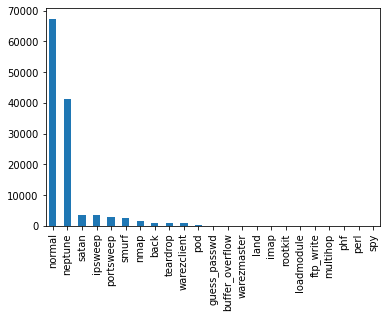

In [20]:
# Ploting the bar plot of attack type variable to check the distribution of different class in the dataset-Train

# In[ ]:


get_ipython().run_line_magic('matplotlib', 'inline')
y_value_counts.plot(kind="bar", fontsize=10)

In [21]:
# Tương tự với test-data

# In[ ]:


y_test_value_counts = df_test['attack_type'].value_counts() 
y_test_value_counts


normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack_type, dtype: int64

<AxesSubplot:>

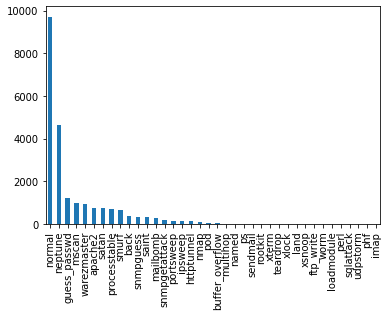

In [22]:
get_ipython().run_line_magic('matplotlib', 'inline')
y_test_value_counts.plot(kind="bar", fontsize=10)

In [23]:
# Observation: The above plot clearly shows that the attack type "normal" has the highest distribution in the data followed by "neptune" and then the other classes whose value count is very less compared to these two classes. The distribution is almost same for both test dataset and train dataset.

# In[ ]:


# counter = Counter(df_train['attack_type'])
# a=dict(counter)
# per=[]
# for k,v in counter.items():
# 	per.append(v / len(df_train['attack_type']) * 100) #calculating the percentage distribution of my class label

In [24]:
# ## Plotting the pie chart of attack type with the percentage distribution of each attack type 

# In[ ]:


# patches, texts = plt.pie(per, startangle=90, radius=2)  #https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart
# labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(a.keys(), per)]
# patches, labels, dummy =  zip(*sorted(zip(patches, labels, per),
#                                           key=lambda x: x[2],
#                                           reverse=True))

# plt.legend(patches,labels , loc='center left', bbox_to_anchor=(-0.1, 1.), fontsize=8)

# plt.savefig('piechart.png', bbox_inches='tight')


In [25]:
# The above plot gives an idea of the percentage value of each class. The normal class covers almost 53% of the data followed by neptune class which covers 32% and then the rest of the classes each covering less than 3% of the entire dataset. From the above plot we can conclude that our dataset is an imbalanced dataset with huge difference in the distribution of different class labels

# Lets have a look at the distribution of each feature of the dataframe.
# 
# ---
# 
# ---
# 
# 
# 
# 

# In[ ]:


# df_train.hist(figsize=(35,35)) 
# plt.tight_layout()
# plt.show()

In [26]:
# ## Now lets view the correlation between features and target variable.

# In[ ]:

#Ma trận tương quan


# In[ ]:


import phik
from phik import resources, report
corr_matrix=df_train.phik_matrix()
corr_matrix

interval columns not set, guessing: ['Duration', 'protocol_type', 'src_bytes', 'dest_bytes', 'Land', 'wrong_fragment', 'Urgent packets', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Score']


,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
Duration,1.000000,0.137743,0.450609,0.405342,0.164407,0.135033,0.000000,0.000000,0.015780,0.104382,...,0.137206,0.592465,0.298200,0.033399,0.110079,0.140700,0.233072,0.240959,0.410612,0.328373
protocol_type,0.137743,1.000000,0.986618,0.427788,0.000000,0.000000,0.003250,0.481678,0.000000,0.039577,...,0.333489,0.276879,0.589328,0.590744,0.334486,0.332243,0.203144,0.210402,0.839022,0.493724
service,0.450609,0.986618,1.000000,0.692821,0.017733,0.000000,0.139223,0.406253,0.050499,0.603425,...,0.815051,0.560429,0.682359,0.687488,0.626868,0.633223,0.415572,0.428705,0.857744,0.610648
flag,0.405342,0.427788,0.692821,1.000000,0.181184,0.040010,0.021895,0.093140,0.000000,0.053099,...,0.542758,0.466461,0.339359,0.208443,0.648644,0.682778,0.627790,0.654591,0.802958,0.337941
src_bytes,0.164407,0.000000,0.017733,0.181184,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007222,0.024774,0.008196,0.000000,0.018050,0.068280,0.022896,0.072944,0.029345,0.084673
dest_bytes,0.135033,0.000000,0.000000,0.040010,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.053766,0.011117,0.000000,0.000000,0.000000,0.011239,0.008128,0.035515,0.096407
Land,0.000000,0.003250,0.139223,0.021895,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.013003,0.000000,0.048302,0.135280,0.028235,0.129478,0.000000,0.000000,0.904487,0.101963
wrong_fragment,0.000000,0.481678,0.406253,0.093140,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.223740,0.123192,0.236966,0.093763,0.130825,0.068645,0.240024,0.040146,0.991632,0.310151
Urgent packets,0.015780,0.000000,0.050499,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.006526,0.016682,0.009224,0.182103,0.000000,0.000000,0.000000,0.000000,0.309222,0.065128
hot,0.104382,0.039577,0.603425,0.053099,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.165062,0.022226,0.023740,0.000000,0.081732,0.104588,0.020160,0.066959,0.340919,0.188387


In [27]:
# In[ ]:


print(corr_matrix["attack_type"].sort_values(ascending=False)[1:])


# In[ ]:


corr = corr_matrix["attack_type"].sort_values(ascending=False)

wrong_fragment                 0.991632
Land                           0.904487
service                        0.857744
protocol_type                  0.839022
logged_in                      0.808240
flag                           0.802958
Score                          0.734857
count                          0.716956
dst_host_srv_diff_host_rate    0.711383
same_srv_rate                  0.672181
dst_host_serror_rate           0.670254
serror_rate                    0.659562
srv_count                      0.645647
srv_serror_rate                0.644567
dst_host_srv_serror_rate       0.643025
dst_host_same_srv_rate         0.641616
dst_host_srv_count             0.638541
dst_host_diff_srv_rate         0.612409
dst_host_same_src_port_rate    0.600643
num_failed_logins              0.588751
rerror_rate                    0.546387
dst_host_rerror_rate           0.543289
dst_host_count                 0.540562
diff_srv_rate                  0.527185
num_shells                     0.522351


In [28]:
attack_sep={'normal':"Normal",'neptune':"DOS",
            'satan':"Probe",'ipsweep':"Probe",'named':"R2L",
            'ps':"U2R",'sendmail':"R2L",'xterm':"U2R",'xlock':"R2L",
            'xsnoop':"R2L",'udpstorm':"DOS",'sqlattack':"U2R",'worm':"DOS",'portsweep':"Probe",
            'smurf':"DOS",'nmap':"Probe",'back':"DOS",'mscan':"Probe",'apache2':"DOS",'processtable':"DOS",
            'snmpguess':"R2L",'saint':"Probe",'mailbomb':"DOS",'snmpgetattack':"R2L",'httptunnel':"R2L",'teardrop':"DOS",
            'warezclient':"R2L",'pod':"DOS",'guess_passwd':"R2L",'buffer_overflow':"U2R",'warezmaster':"R2L",'land':"DOS",'imap':"R2L",
            'rootkit':"U2R",'loadmodule':"U2R",'ftp_write':"R2L",'multihop':"R2L",'phf':"R2L",'perl':"U2R",'spy':"R2L"}


# In[7]:


df_train.replace({'attack_type':attack_sep},inplace=True)


# In[8]:


df_test.replace({'attack_type':attack_sep},inplace=True)


# # Lets train a base model on the entire dataset and evaluate the performance.

In [29]:
# In[9]:


from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df_train['protocol_type']= label_encoder.fit_transform(df_train['protocol_type']) 
df_test['protocol_type']= label_encoder.fit_transform(df_test['protocol_type']) 

label_encoder = preprocessing.LabelEncoder() 
  
df_train['service']= label_encoder.fit_transform(df_train['service']) 
df_test['service']= label_encoder.transform(df_test['service']) 

label_encoder = preprocessing.LabelEncoder() 

df_train['flag']= label_encoder.fit_transform(df_train['flag']) 
df_test['flag']= label_encoder.transform(df_test['flag']) 

In [30]:
# In[10]:

#tách feature và labels

y=df_train['attack_type']   #labels
X=df_train.drop(['attack_type'],axis=1) #feature

y_test=df_test['attack_type']
X_test=df_test.drop(['attack_type'],axis=1)

In [31]:
# In[11]:


sc = StandardScaler()  #Chuẩn hóa dữ liệu
X_train = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [32]:
# # Lets build a base model on our dataset

# In[18]:


def falseposrate(conf_matrix,y_test,pred):
  FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix) 
  FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
  TP = np.diag(conf_matrix)
  TN = conf_matrix.sum() - (FP + FN + TP)
  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  FPR = FP/(FP+TN)
  recall = recall_score(y_test, pred,average='micro')
  precision = precision_score(y_test, pred,average='micro')
  return FPR,recall,precision

In [33]:
# In[ ]:

#sử dụng Support Vector Machine
# get_ipython().run_line_magic('matplotlib', 'inline')
# clf= svm.SVC(kernel='linear',probability=True)
# clf.fit(X_train,y) #learning
# pred = clf.predict(X_test) #kết quả sau khi test
# recall = recall_score(y_test, pred,average='micro')
# precision = precision_score(y_test, pred,average='micro')
# score = metrics.accuracy_score(y_test, pred)
# f1score= f1_score(y_test, pred, average='micro')
# print("Accuracy :",score)
# print('=' * 50)
# print("F1 score :",f1score)

# cnf_matrix = confusion_matrix(y_test, pred) #confusion matrix của nhẫn tấn công (test data) và kết quả sau khi test
# #sns.heatmap(cnf_matrix)
# fig, ax = plt.subplots(figsize=(15, 8))
# disp = plot_confusion_matrix(clf, X_test, y_test,ax=ax,cmap=plt.cm.Blues)
# plt.show()

# print('_' * 50)
# print(cnf_matrix)

# FPR= falseposrate(cnf_matrix, y_test, pred)
# print('=' * 50)
# print("|False positive Rate :|")
# print('=' * 50)
# print(FPR)
# print('=' * 50)
# print("|Precision:|")
# print('=' * 50)
# print(precision)
# print('=' * 50)
# print("|recall:|")
# print('=' * 50)
# print( recall)
# print('=' * 50)
# print("|Classification report|")
# print('=' * 50)
# print(metrics.classification_report(y_test,pred))

Accuracy : 0.7623208978396842
F1 score : 0.7623208978396842


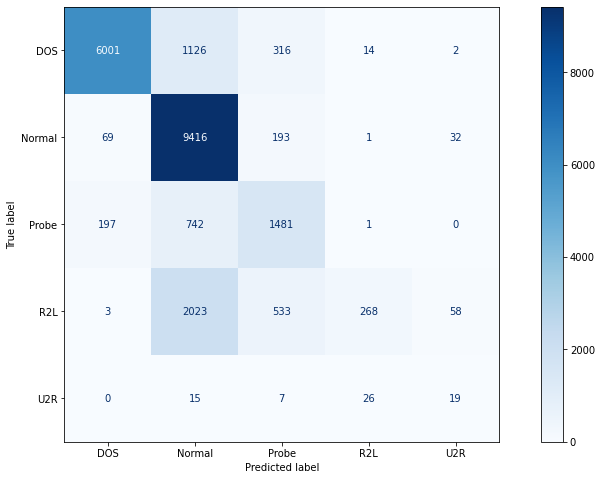

__________________________________________________
[[6001 1126  316   14    2]
 [  69 9416  193    1   32]
 [ 197  742 1481    1    0]
 [   3 2023  533  268   58]
 [   0   15    7   26   19]]
|False positive Rate :|
(array([0.01783347, 0.30439526, 0.05213199, 0.00213653, 0.00409326]), 0.7623208978396842, 0.7623208978396842)
|Precision:|
0.7623208978396842
|recall:|
0.7623208978396842
|Classification report|
              precision    recall  f1-score   support

         DOS       0.96      0.80      0.87      7459
      Normal       0.71      0.97      0.82      9711
       Probe       0.59      0.61      0.60      2421
         R2L       0.86      0.09      0.17      2885
         U2R       0.17      0.28      0.21        67

    accuracy                           0.76     22543
   macro avg       0.66      0.55      0.53     22543
weighted avg       0.80      0.76      0.73     22543



In [34]:
# In[ ]:

#sử dụng DecisionTreeClassifier
get_ipython().run_line_magic('matplotlib', 'inline')
clf= DecisionTreeClassifier()
clf.fit(X_train,y) #learning
pred = clf.predict(X_test) #kết quả sau khi test
recall = recall_score(y_test, pred,average='micro')
precision = precision_score(y_test, pred,average='micro')
score = metrics.accuracy_score(y_test, pred)
f1score= f1_score(y_test, pred, average='micro')
print("Accuracy :",score)
print('=' * 50)
print("F1 score :",f1score)

cnf_matrix = confusion_matrix(y_test, pred) #confusion matrix của nhẫn tấn công (test data) và kết quả sau khi test
#sns.heatmap(cnf_matrix)
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(clf, X_test, y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

print('_' * 50)
print(cnf_matrix)

FPR= falseposrate(cnf_matrix, y_test, pred)
print('=' * 50)
print("|False positive Rate :|")
print('=' * 50)
print(FPR)
print('=' * 50)
print("|Precision:|")
print('=' * 50)
print(precision)
print('=' * 50)
print("|recall:|")
print('=' * 50)
print( recall)
print('=' * 50)
print("|Classification report|")
print('=' * 50)
print(metrics.classification_report(y_test,pred))

Accuracy : 0.4427094885330258
F1 score : 0.4427094885330258


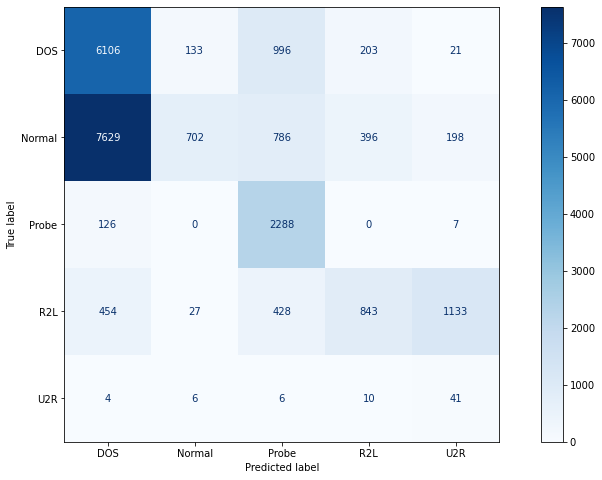

__________________________________________________
[[6106  133  996  203   21]
 [7629  702  786  396  198]
 [ 126    0 2288    0    7]
 [ 454   27  428  843 1133]
 [   4    6    6   10   41]]
|False positive Rate :|
(array([0.54448422, 0.01293641, 0.11012822, 0.03097975, 0.0604645 ]), 0.4427094885330258, 0.4427094885330258)
|Precision:|
0.4427094885330258
|recall:|
0.4427094885330258
|Classification report|
              precision    recall  f1-score   support

         DOS       0.43      0.82      0.56      7459
      Normal       0.81      0.07      0.13      9711
       Probe       0.51      0.95      0.66      2421
         R2L       0.58      0.29      0.39      2885
         U2R       0.03      0.61      0.06        67

    accuracy                           0.44     22543
   macro avg       0.47      0.55      0.36     22543
weighted avg       0.62      0.44      0.36     22543



In [35]:
# In[ ]:

#sử dụng Naive Bayes
get_ipython().run_line_magic('matplotlib', 'inline')
clf= GaussianNB()
clf.fit(X_train,y) #learning
pred = clf.predict(X_test) #kết quả sau khi test
recall = recall_score(y_test, pred,average='micro')
precision = precision_score(y_test, pred,average='micro')
score = metrics.accuracy_score(y_test, pred)
f1score= f1_score(y_test, pred, average='micro')
print("Accuracy :",score)
print('=' * 50)
print("F1 score :",f1score)

cnf_matrix = confusion_matrix(y_test, pred) #confusion matrix của nhẫn tấn công (test data) và kết quả sau khi test
#sns.heatmap(cnf_matrix)
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(clf, X_test, y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

print('_' * 50)
print(cnf_matrix)

FPR= falseposrate(cnf_matrix, y_test, pred)
print('=' * 50)
print("|False positive Rate :|")
print('=' * 50)
print(FPR)
print('=' * 50)
print("|Precision:|")
print('=' * 50)
print(precision)
print('=' * 50)
print("|recall:|")
print('=' * 50)
print( recall)
print('=' * 50)
print("|Classification report|")
print('=' * 50)
print(metrics.classification_report(y_test,pred))

In [36]:
#phần này đang thử chưa hoàn thiện
#Cải thiện hiệu suất bằng việc lựa chọn thuộc tính (feature selection)

abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.5]

In [37]:
new_df= df_train[relevant_features.index]
new_df_test= df_test[relevant_features.index]


In [38]:
y_cfs=new_df['attack_type']
X_cfs=new_df.drop(['attack_type'],axis=1)

y_test_cfs=new_df_test['attack_type']
X_test_cfs=new_df_test.drop(['attack_type'],axis=1)

In [39]:
sc = StandardScaler()
X_train_cfs = sc.fit_transform(X_cfs)
X_test_cfs = sc.transform(X_test_cfs)

In [40]:
from catboost import CatBoostClassifier


# In[ ]:


def training(clf,xtrain,xtest,ytrain,ytest,attack_type):
    print('\n')
    print('=' * 50)
    print("Training ",attack_type)
    print(clf)
    clf.fit(xtrain, ytrain)
    print('_' * 50)
    pred = clf.predict(xtest)
    print('_' * 50)
    roc = roc_auc_score(ytest, clf.predict_proba(xtest), multi_class='ovo', average='weighted')
    score = metrics.accuracy_score(ytest, pred)
    f1score= f1_score(ytest, pred, average='micro')
    print("accuracy:   %0.3f" % score)
    print()
    print('_' * 50)
    print("|classification report|")
    print('_' * 50)
    print(metrics.classification_report(ytest, pred))
    print('_' * 50)
    print("confusion matrix:")
    print(metrics.confusion_matrix(ytest, pred))
    cm= metrics.confusion_matrix(ytest, pred)
    print()
    print('_' * 50)
    print("ROC AUC Score :",roc)
    FPR,precision,recall= falseposrate(cm,ytest,pred)
    print('_' * 50)
    print("False Positive Rate is :",FPR)
    clf_descr = str(clf).split('(')[0]
    return clf_descr,score, f1score,roc,FPR,precision,recall

In [43]:
results_CFS= []

for clf, name in (
        (GaussianNB() ,"Naive Bayes"),
        # (KNeighborsClassifier(n_neighbors = 7),"KNN"),
        #(OneVsRestClassifier(svm.SVC(probability=True)),"One vs Rest SVM "),
        (RandomForestClassifier(), "Random forest"),(DecisionTreeClassifier(random_state=0),"Decision Tree"),
        #(XGBClassifier(),"XGBOOST"),(svm.SVC(kernel='linear',probability=True),"SVM Linear"),
        #(CatBoostClassifier(iterations=5,learning_rate=0.1),"CAT Boost")
        ):
    print('=' * 80)
    print(name)

    results_CFS.append(training(clf,X_train_cfs,X_test_cfs,y_cfs,y_test_cfs,"CFS"))

Naive Bayes


Training  CFS
GaussianNB()
__________________________________________________
__________________________________________________
accuracy:   0.575

__________________________________________________
|classification report|
__________________________________________________
              precision    recall  f1-score   support

         DOS       0.82      0.30      0.44      7459
      Normal       0.87      0.74      0.80      9711
       Probe       0.31      0.94      0.47      2421
         R2L       0.53      0.42      0.47      2885
         U2R       0.03      0.75      0.05        67

    accuracy                           0.57     22543
   macro avg       0.51      0.63      0.45     22543
weighted avg       0.75      0.57      0.60     22543

__________________________________________________
confusion matrix:
[[2259 1017 3719  285  179]
 [ 443 7162  741  771  594]
 [  55    3 2272   10   81]
 [   5   45  581 1219 1035]
 [   1    0    1   15   50]]

____________